### Name: TJ Dunne

### Number: 16143892

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score

In [2]:
from sklearn import cluster
from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn.decomposition import PCA

In [3]:
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [52]:
import warnings
from sklearn.exceptions import FitFailedWarning
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

In [4]:
# I used this to create more colours for the clustering scatterplot function.
# This was because innitialy I had 144 clusters and wanted each cluster to have a different colour.

# Generate 50 random integers between 0 and 0xFFFFFF (inclusive)
hex_values = np.random.randint(0, 0xFFFFFF, size=150)


# Create a list of 50 hex strings, where each string is prefixed with a '#' character,
# and has a length of 6 characters by filling with leading zeros.
hex_strings = ['#' + hex(x)[2:].zfill(6) for x in hex_values]

# Convert the list of hex strings to a NumPy array.
colors = np.array(hex_strings)

In [56]:
# Function taken from example notebook.
# Code modified to output a larger graph.



def clustering_scatterplot(points, labels, centers, title):
    fig, ax = plt.subplots(figsize=(10, 10))  # Increase the figure size here

    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = ax.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label='cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        ax.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    ax.set_title(title)
    ax.legend()
    ax.set_xlabel('x')
    ax.set_ylabel('y')

### Task 2

In [6]:
# Load the data
data = pd.read_csv('loans_train_prepared.csv')

In [8]:
# Data looks to be scaled already 
data.describe().transpose()

count      mean       std       min       25%  \
Dependents               614.0  0.248100  0.336541  0.000000  0.000000   
ApplicantIncome          614.0  0.916588  0.412366  0.004634  0.662440   
LoanAmount               614.0  1.076222  0.338744  0.005026  0.883668   
Loan_Amount_Term         614.0  0.713355  0.134226  0.025000  0.750000   
Credit_History           614.0  0.855049  0.352339  0.000000  1.000000   
Gender_Male              614.0  0.796417  0.402991  0.000000  1.000000   
Gender_nan               614.0  0.021173  0.144077  0.000000  0.000000   
Married_Yes              614.0  0.648208  0.477919  0.000000  0.000000   
Married_nan              614.0  0.004886  0.069786  0.000000  0.000000   
Self_Employed_Yes        614.0  0.133550  0.340446  0.000000  0.000000   
Self_Employed_nan        614.0  0.052117  0.222445  0.000000  0.000000   
Education_Not Graduate   614.0  0.218241  0.413389  0.000000  0.000000   
Property_Area_Semiurban  614.0  0.379479  0.485653  0.000000  0.000000   
Property_Area_Urban      614.0  0.328990  0.470229  0.000000  0.000000   
Loan_Status_Y            614.0  0.687296  0.463973  0.000000  0.000000   
TotalIncome              614.0  0.862686  0.428068  0.005599  0.597383   

                              50%       75%       max  
Dependents               0.000000  0.333333  1.000000  
ApplicantIncome          0.815365  1.078246  3.357480  
LoanAmount               1.047319  1.229571  2.461145  
Loan_Amount_Term         0.750000  0.750000  1.000000  
Credit_History           1.000000  1.000000  1.000000  
Gender_Male              1.000000  1.000000  1.000000  
Gender_nan               0.000000  0.000000  1.000000  
Married_Yes              1.000000  1.000000  1.000000  
Married_nan              0.000000  0.000000  1.000000  
Self_Employed_Yes        0.000000  0.000000  1.000000  
Self_Employed_nan        0.000000  0.000000  1.000000  
Education_Not Graduate   0.000000  0.000000  1.000000  
Property_Area_Semiurban  0.000000  1.000000  1.000000  
Property_Area_Urban      0.000000  1.000000  1.000000  
Loan_Status_Y            1.000000  1.000000  1.000000  
TotalIncome              0.783902  1.035796  3.207353

In [9]:
# Create a PCA object with desired number of components
pca = PCA()

# Fit the data to the PCA model
pca.fit(data)

# Get the explained variance ratios of each component
variance_ratios = pca.explained_variance_ratio_

In [10]:
# Print the percentage variance explained by each principal component
for i, ratio in enumerate(variance_ratios):
    print(f"Principal Component {i+1}: {ratio*100:.2f}% variance")

Principal Component 1: 19.30% variance
Principal Component 2: 16.99% variance
Principal Component 3: 13.30% variance
Principal Component 4: 12.06% variance
Principal Component 5: 7.26% variance
Principal Component 6: 6.06% variance
Principal Component 7: 5.03% variance
Principal Component 8: 4.64% variance
Principal Component 9: 4.13% variance
Principal Component 10: 3.22% variance
Principal Component 11: 2.62% variance
Principal Component 12: 2.21% variance
Principal Component 13: 1.38% variance
Principal Component 14: 0.82% variance
Principal Component 15: 0.77% variance
Principal Component 16: 0.22% variance


In [11]:
percentage = 0
# Print the percentage variance captured with n number of components
for i, ratio in enumerate(variance_ratios):
    percentage += ratio
    print(f"Percentage captured with {i+1} component: {percentage*100:.2f}%")

Percentage captured with 1 component: 19.30%
Percentage captured with 2 component: 36.29%
Percentage captured with 3 component: 49.59%
Percentage captured with 4 component: 61.65%
Percentage captured with 5 component: 68.91%
Percentage captured with 6 component: 74.96%
Percentage captured with 7 component: 80.00%
Percentage captured with 8 component: 84.64%
Percentage captured with 9 component: 88.76%
Percentage captured with 10 component: 91.98%
Percentage captured with 11 component: 94.60%
Percentage captured with 12 component: 96.81%
Percentage captured with 13 component: 98.18%
Percentage captured with 14 component: 99.01%
Percentage captured with 15 component: 99.78%
Percentage captured with 16 component: 100.00%


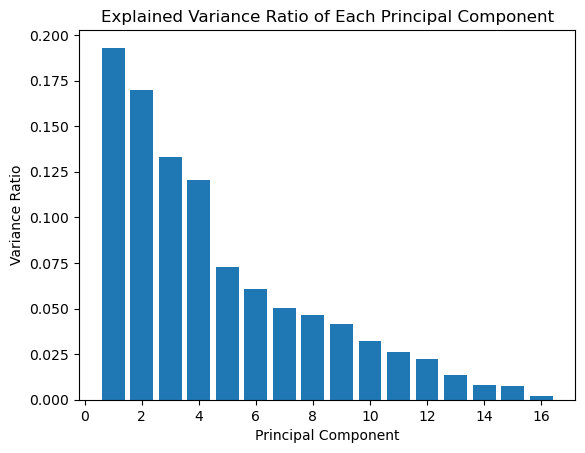

In [12]:
# Create a bar plot to visualize the variance ratios
plt.bar(range(1, len(variance_ratios)+1), variance_ratios)
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.title('Explained Variance Ratio of Each Principal Component')
plt.show()


In [13]:
# 7 components were selected as they would contain 80%
# of the variance in all the data
pca_2 = PCA(n_components=7)
pca_2.fit(data)
data_transformed = pca_2.transform(data)

In [14]:
# Fit the KMeans model for k values ranging from 1 to 614
# The entire range of the data was used when trying 
# to find the optimal k value
k_range = range(1, len(data_transformed))

# Initialize an empty list to store the sum of squared distances for each value of k
sum_of_squared_distances = []

# Iterate over each value of k
for k in k_range:
    # Create a KMeans instance with k clusters and 'auto' initialization
    km = KMeans(n_clusters=k, n_init='auto')

    # Fit the KMeans model to the data
    km.fit(data_transformed)

    # Calculate and append the sum of squared distances to the list
    sum_of_squared_distances.append(km.inertia_)

In [15]:
# Plot the sum of squared distances
fig, ax = plt.subplots(figsize=(15,15))
ax.plot(k_range, sum_of_squared_distances, 'bx-')
ax.set_xlabel('k')
ax.set_ylabel('Sum of squared distances')
ax.set_title('Elbow Method For Optimal k')
plt.show()

In [16]:
# Define the range of k values to consider
k_range = range(2, len(data_transformed))

# Initialize an empty list to store the silhouette scores for each value of k
silhouette_scores = []

# Iterate over each value of k
for k in k_range:
    # Create a KMeans instance with k clusters, a fixed random state, and automatic initialization
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')

    # Fit the KMeans model to the data and obtain the cluster labels
    labels = km.fit_predict(data_transformed)

    # Calculate the silhouette score for the fitted model and append it to the list
    silhouette_scores.append(silhouette_score(data_transformed, labels))

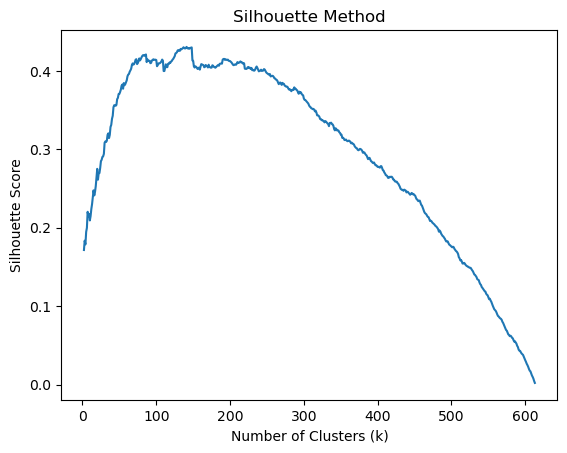

Optimal number of clusters: 141


In [17]:
# Plot the silhouette scores against the number of clusters (k)
plt.plot(k_range, silhouette_scores)
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Find the optimal value of k
# Optimal value of k is the value with the largest 
# Silhouette score.
optimal_k = k_range[np.argmax(silhouette_scores)]
print("Optimal number of clusters:", optimal_k)

In [18]:
# Set k to the optimal value found using the Silhouette Score.
# This optimal value also seems to align with my elbow graph.
k = optimal_k

In [19]:
# Create a KMeans object with k clusters, 10 initializations, and a maximum of 300 iterations per initialization
clustered_data_sklearn = KMeans(n_clusters=k, n_init=10, max_iter=300)

# Apply the KMeans algorithm to the transformed data and fit the resulting model
clustered_data_sklearn.fit(data_transformed)

KMeans(n_clusters=141, n_init=10)

In [20]:
# Combine the transformed data and cluster centers into a single array along the first axis using np.r_
data_and_centers = np.r_[data_transformed,clustered_data_sklearn.cluster_centers_]

In [21]:
# Create an MDS object with 2 output dimensions and automatic normalization of stress
XYcoordinates = manifold.MDS(n_components=2, normalized_stress='auto').fit_transform(data_and_centers)

# Print a message indicating that the transformation is complete
print("transformation complete")

transformation complete


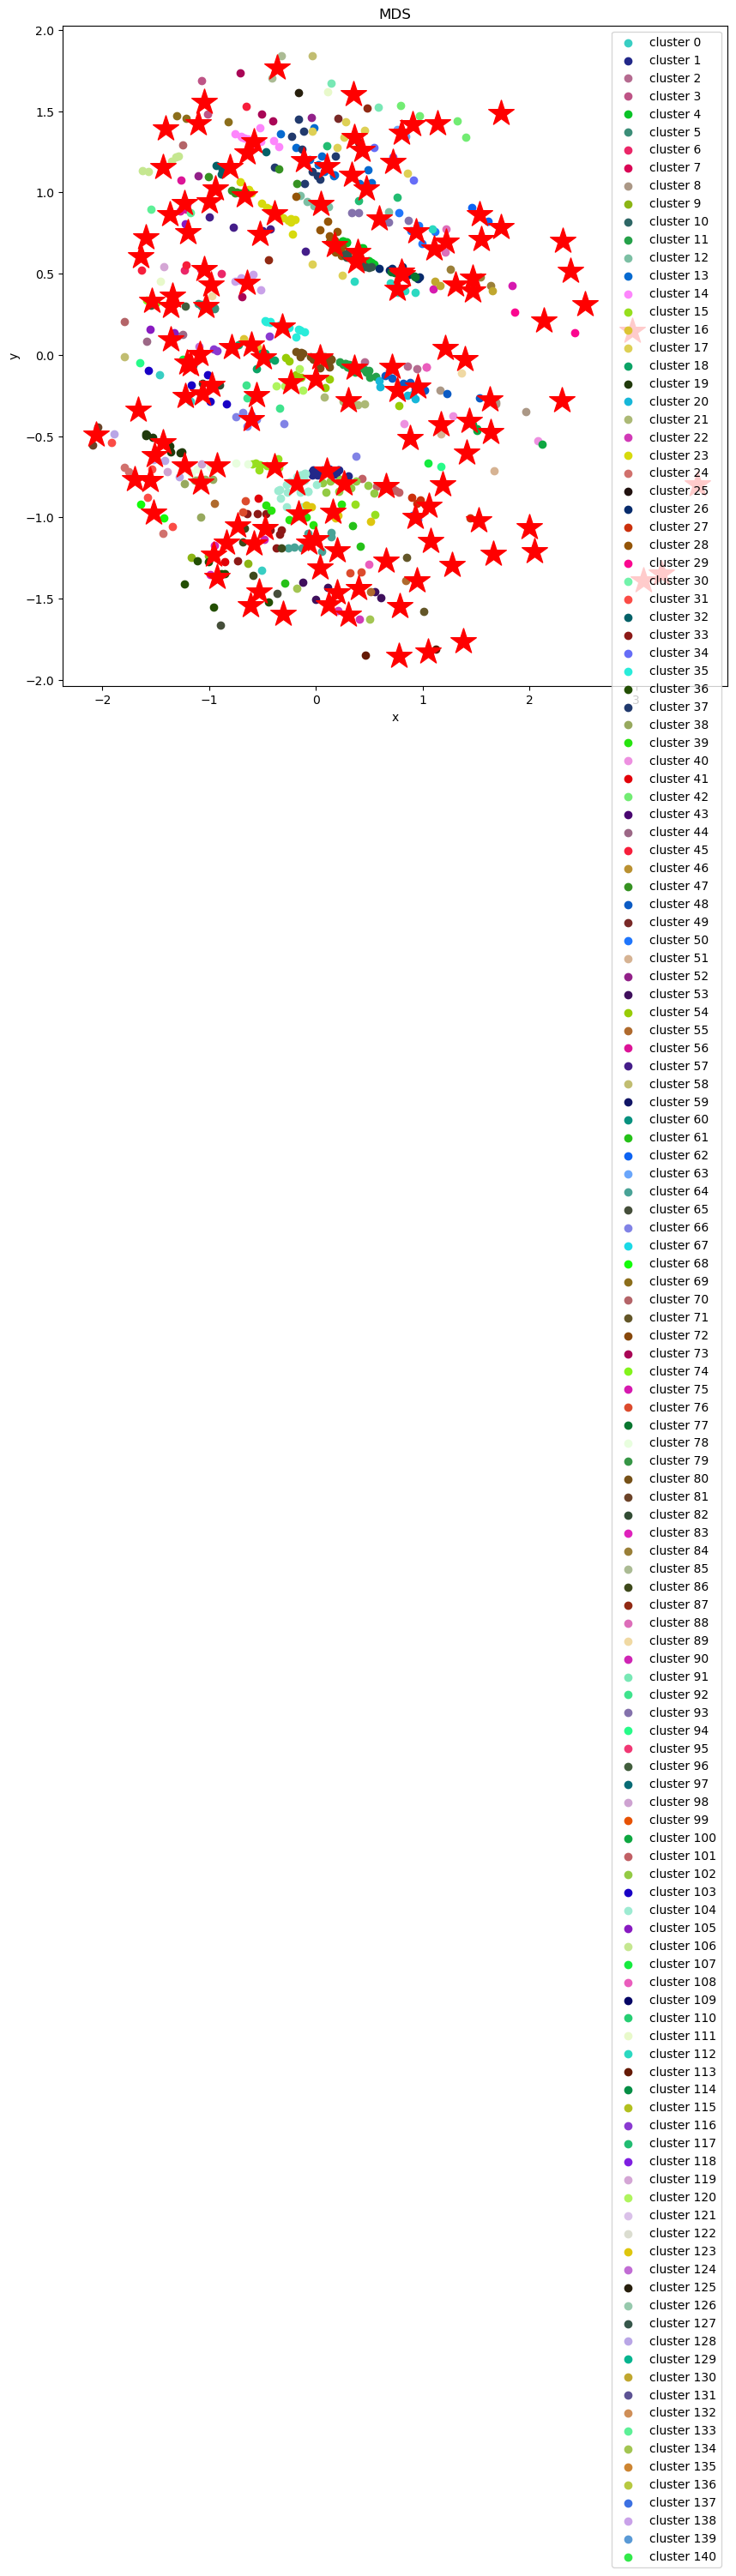

In [22]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

In [23]:
# Create a TSNE object with 2 output dimensions
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


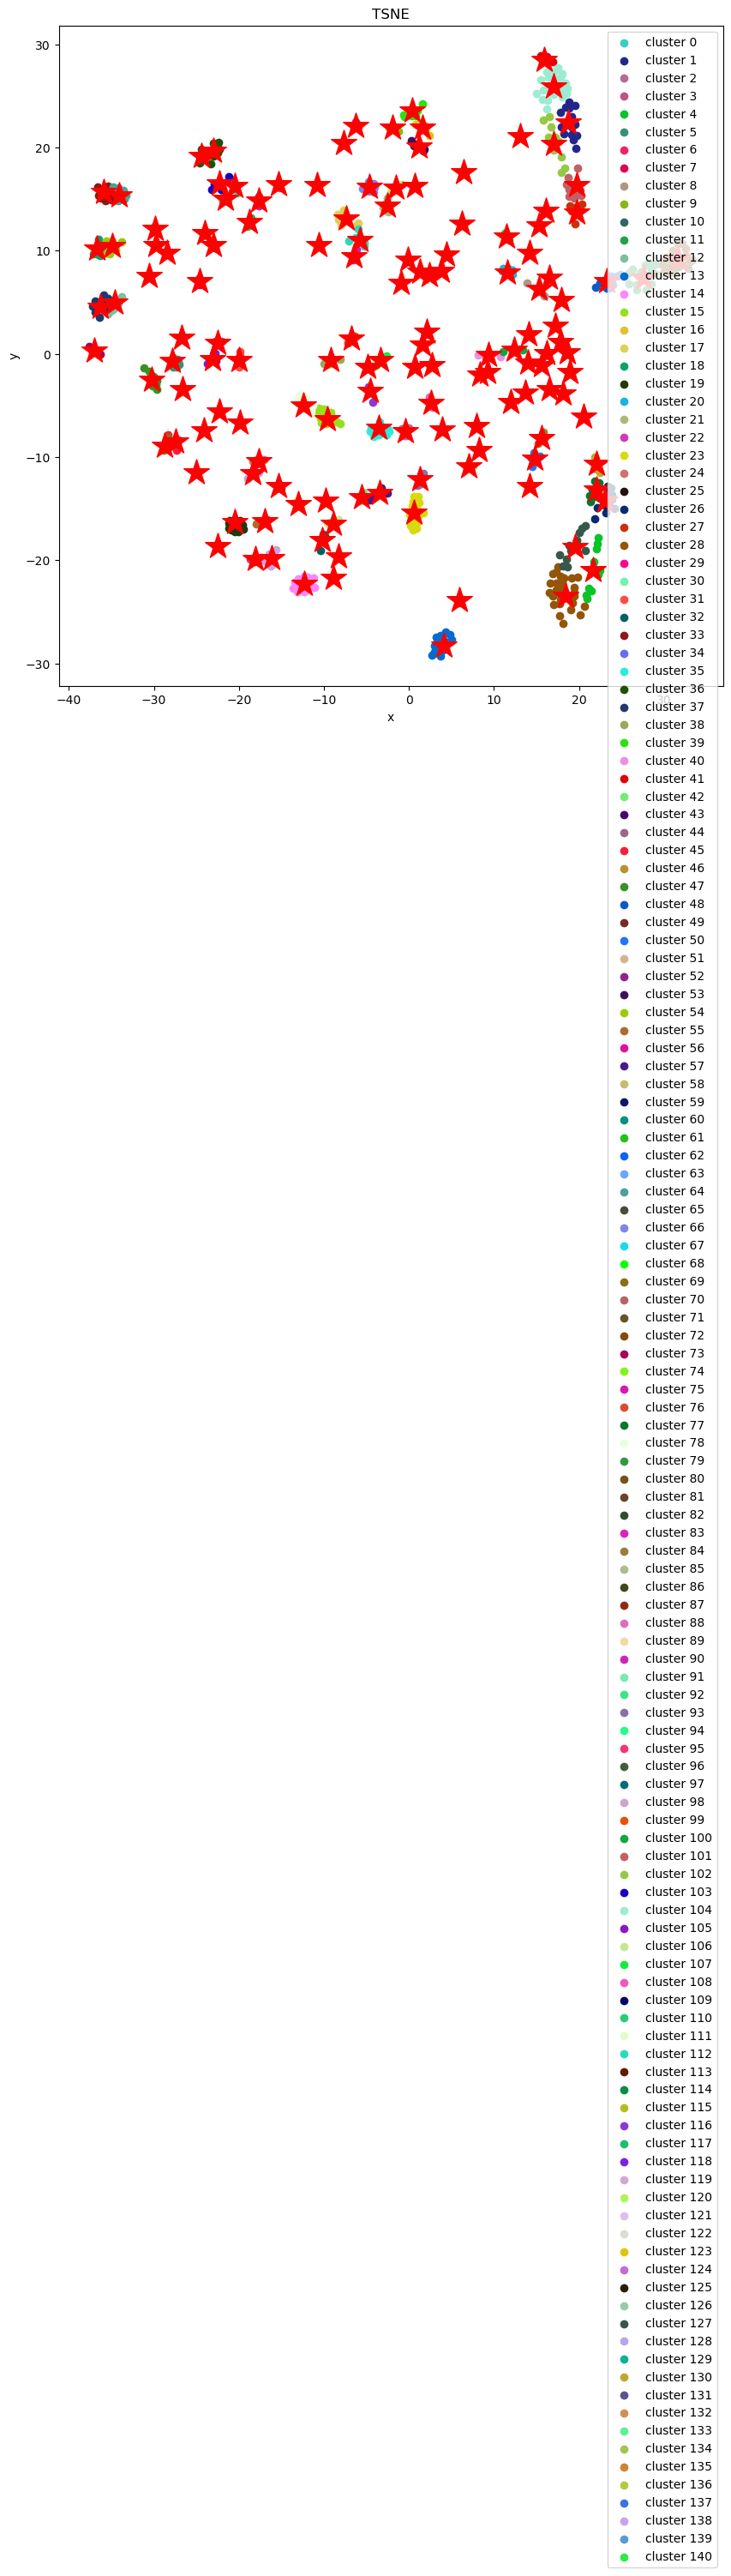

In [24]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')


### Redo with lower Range for K values


In [25]:
# Fit the KMeans model for k values ranging from 1 to 614
# The entire range of the data was used when trying 
# to find the optimal k value
k_range = range(2, 11)

# Initialize an empty list to store the sum of squared distances for each value of k
sum_of_squared_distances = []

# Iterate over each value of k
for k in k_range:
    # Create a KMeans instance with k clusters and 'auto' initialization
    km = KMeans(n_clusters=k, n_init='auto')

    # Fit the KMeans model to the data
    km.fit(data)

    # Calculate and append the sum of squared distances to the list
    sum_of_squared_distances.append(km.inertia_)

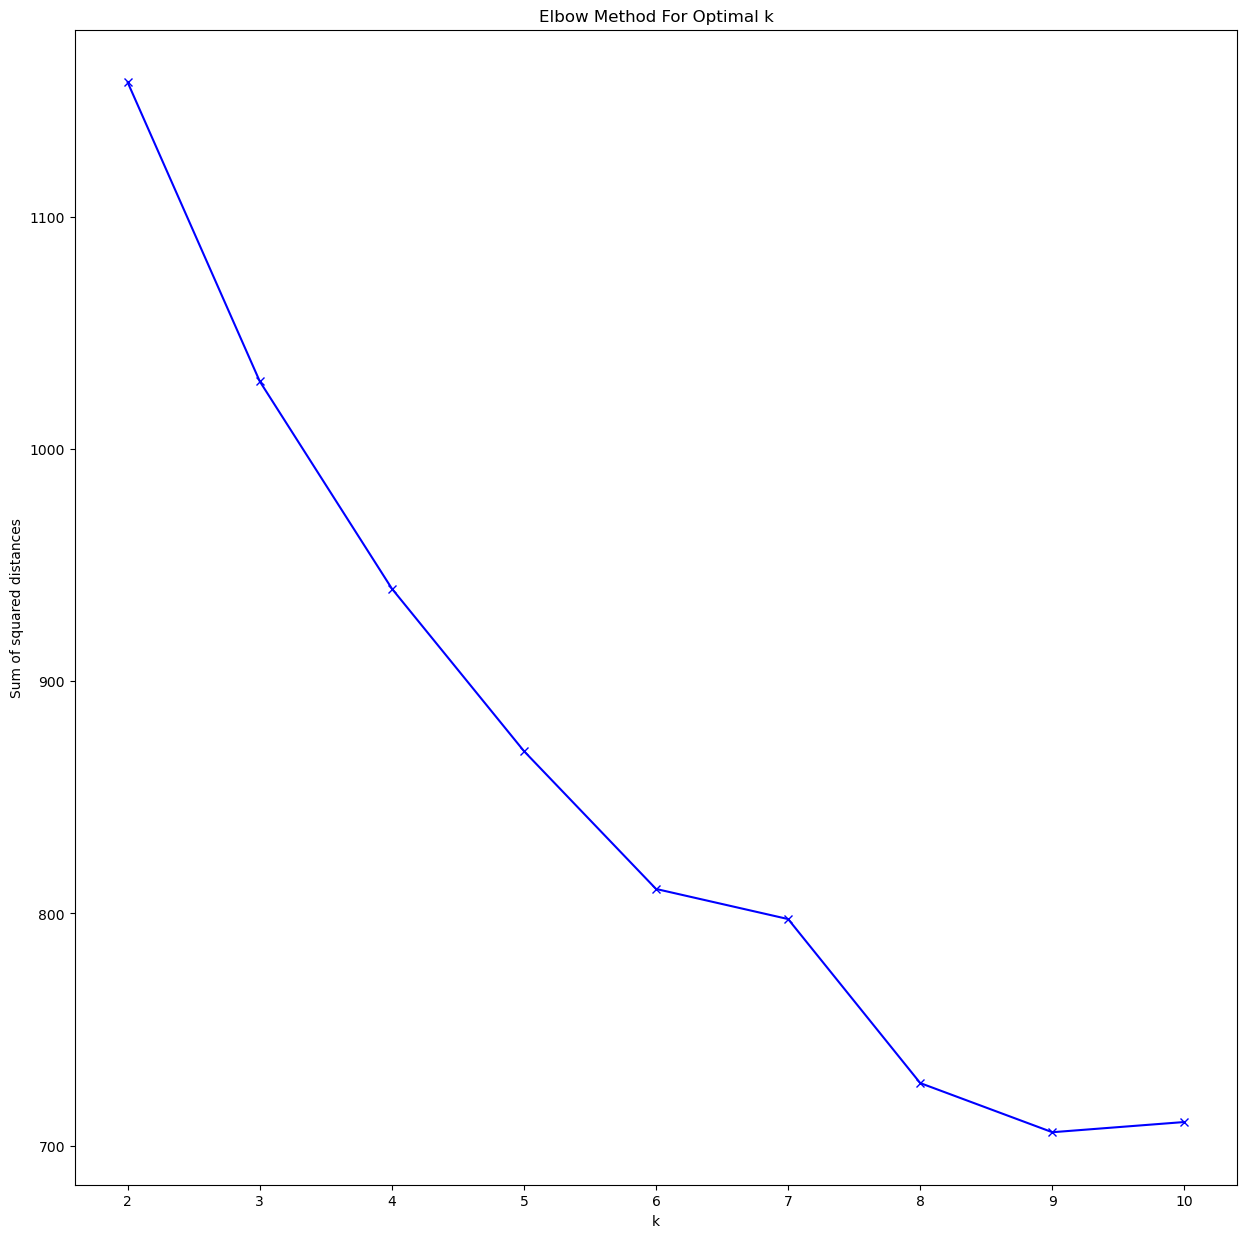

In [26]:
# Plot the sum of squared distances
fig, ax = plt.subplots(figsize=(15,15))
ax.plot(k_range, sum_of_squared_distances, 'bx-')
ax.set_xlabel('k')
ax.set_ylabel('Sum of squared distances')
ax.set_title('Elbow Method For Optimal k')
plt.show()

In [27]:
# Define the range of k values to consider
k_range = range(2, 11)

# Initialize an empty list to store the silhouette scores for each value of k
silhouette_scores = []

# Iterate over each value of k
for k in k_range:
    # Create a KMeans instance with k clusters, a fixed random state, and automatic initialization
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')

    # Fit the KMeans model to the data and obtain the cluster labels
    labels = km.fit_predict(data)

    # Calculate the silhouette score for the fitted model and append it to the list
    silhouette_scores.append(silhouette_score(data, labels))

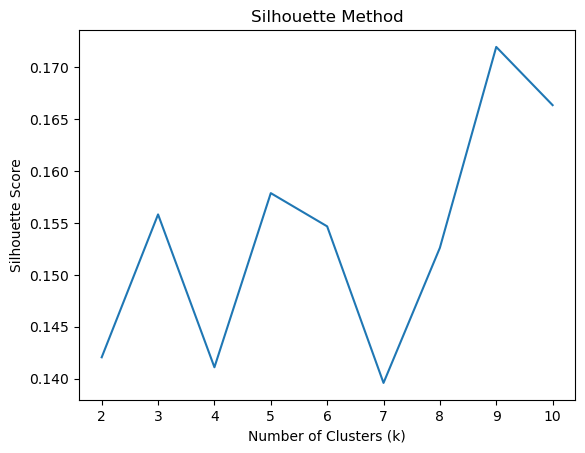

Optimal number of clusters: 9


In [28]:
# Plot the silhouette scores against the number of clusters (k)
plt.plot(k_range, silhouette_scores)
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Find the optimal value of k
# Optimal value of k is the value with the largest 
# Silhouette score.
optimal_k = k_range[np.argmax(silhouette_scores)]
print("Optimal number of clusters:", optimal_k)

In [29]:
# Selected k value from elbow method and silhouette method.
k = 9

In [30]:
clustered_data_sklearn = KMeans(n_clusters=k, n_init=10, max_iter=300)

# Apply the KMeans algorithm to the transformed data and fit the resulting model
clustered_data_sklearn.fit(data)

KMeans(n_clusters=9, n_init=10)

In [31]:
# Combine the transformed data and cluster centers into a single array along the first axis using np.r_
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

In [32]:
# Create an MDS object with 2 output dimensions and automatic normalization of stress
XYcoordinates = manifold.MDS(n_components=2, normalized_stress='auto').fit_transform(data_and_centers)

# Print a message indicating that the transformation is complete
print("transformation complete")

transformation complete


In [33]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

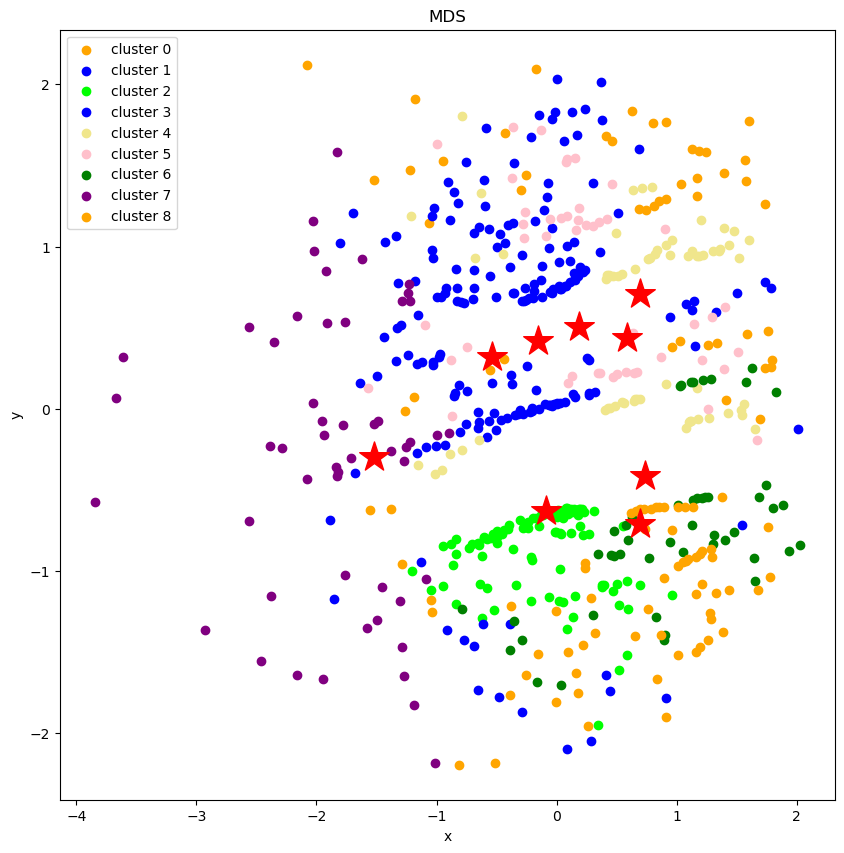

In [34]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

In [35]:
# Create a TSNE object with 2 output dimensions
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


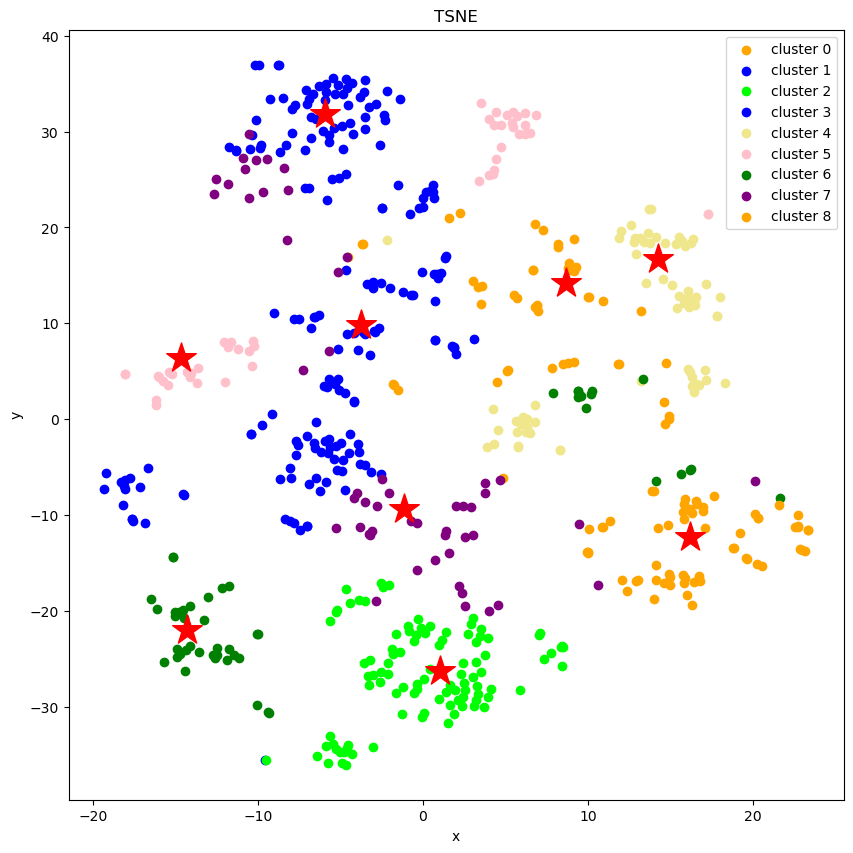

In [36]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

### Cluster Analysis

1. Cluster 0: Low values for Dependents, ApplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History. High proportion of Education_Not Graduate, low proportion of Gender_Male.

2. Cluster 1: High values for ApplicantIncome, LoanAmount, and Loan_Amount_Term. High proportions of Credit_History, Gender_Male, Married_Yes, Self_Employed_Yes, Education_Not Graduate, Property_Area_Semiurban, and Loan_Status_Y. Suggests higher-income applicants are more likely to be male, married, self-employed, and living in semi-urban areas with better credit history and higher loan approval chances.

3. Cluster 2: High values for ApplicantIncome, LoanAmount, and Credit_History. High proportions of Gender_Male, Married_Yes, Education_Not Graduate, Property_Area_Urban, and Loan_Status_Y. Suggests higher-income applicants with better credit histories who are more likely to be male, married, living in urban areas, and have higher loan approval chances.

4. Cluster 3: Low value for Credit_History. High proportions of Education_Not Graduate, Property_Area_Semiurban, and Loan_Status_Y. Suggests applicants with lower credit histories who are more likely to live in semi-urban areas and have a higher chance of loan approval.

5. Cluster 4: High values for Credit_History, Gender_Male, Property_Area_Urban, and Loan_Status_Y. High proportion of Self_Employed_Yes. Suggests applicants are more likely to be male, self-employed, living in urban areas, with better credit histories and higher loan approval chances.

6. Cluster 5: Low values for LoanAmount and Credit_History. High proportions of Gender_nan, Married_nan, Self_Employed_nan, Education_Not Graduate, Property_Area_Semiurban, and Loan_Status_Y.

7. Cluster 6: Low values for ApplicantIncome and TotalIncome. High proportions of Self_Employed_Yes, Education_Not Graduate, and Property_Area_Semiurban. Suggests applicants with lower incomes who are more likely to be self-employed, have a lower education level, and live in semi-urban areas.

8. Cluster 7: High values for ApplicantIncome, LoanAmount, and Property_Area_Urban. High proportions of Married_Yes and Loan_Status_Y. Suggests higher-income applicants who are more likely to be married, live in urban areas, and have higher loan approval chances.

9. Cluster 8: Low values for Dependents and Total Income. High proportions of Self_Employed_nan, Education_Not Graduate, Property_Area_Urban, and Loan_Status_Y. Suggests applicants with lower incomes who are more likely to be self-employed or have a lower level of education.


In [37]:
data['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=data.index)

In [38]:
data.groupby('cluster').mean()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
cluster                                                              
0          0.102041         0.804940    0.963382          0.742347   
1          0.322222         0.819475    1.057805          0.698958   
2          0.266667         0.858333    1.108187          0.721750   
3          0.299020         0.817019    1.061285          0.701103   
4          0.074627         0.849774    0.977185          0.727612   
5          0.390071         0.799574    1.025073          0.672872   
6          0.278912         0.729983    0.906497          0.710714   
7          0.371795         1.878057    1.611840          0.711538   
8          0.086022         0.897945    0.996584          0.737097   

         Credit_History  Gender_Male  Gender_nan  Married_Yes  Married_nan  \
cluster                                                                      
0              0.775510     0.530612    0.040816     0.102041     0.000000   
1              0.991667     0.983333    0.008333     1.000000     0.000000   
2              1.000000     0.850000    0.010000     1.000000     0.000000   
3              0.147059     0.911765    0.044118     0.897059     0.000000   
4              0.985075     0.597015    0.000000     0.000000     0.014925   
5              1.000000     0.957447    0.000000     0.978723     0.000000   
6              0.979592     0.816327    0.000000     0.489796     0.000000   
7              0.884615     0.807692    0.076923     0.807692     0.000000   
8              0.822581     0.500000    0.032258     0.000000     0.032258   

         Self_Employed_Yes  Self_Employed_nan  Education_Not Graduate  \
cluster                                                                 
0                 0.122449           0.081633                0.265306   
1                 0.116667           0.075000                0.000000   
2                 0.110000           0.030000                0.000000   
3                 0.088235           0.029412                0.294118   
4                 0.074627           0.059701                0.044776   
5                 0.127660           0.042553                1.000000   
6                 0.142857           0.061224                1.000000   
7                 0.346154           0.038462                0.038462   
8                 0.145161           0.048387                0.000000   

         Property_Area_Semiurban  Property_Area_Urban  Loan_Status_Y  \
cluster                                                                
0                       0.000000             0.632653       0.000000   
1                       0.000000             0.641667       0.891667   
2                       1.000000             0.000000       0.910000   
3                       0.235294             0.250000       0.014706   
4                       0.000000             0.567164       1.000000   
5                       0.000000             0.489362       0.723404   
6                       0.816327             0.000000       0.877551   
7                       0.288462             0.307692       0.711538   
8                       1.000000             0.000000       0.677419   

         TotalIncome  
cluster               
0           0.752852  
1           0.826002  
2           0.845162  
3           0.799860  
4           0.730735  
5           0.728233  
6           0.653915  
7           1.782928  
8           0.755356

### Task 2 Conclusion

Initially, when carrying out the elbow and silhouette methods, I used the full range of data to test as a viable option for k. This meant testing from 2 clusters to 614 clusters. When using this method, the optimal value for k was around 200. To reduce this, I carried out a principle component analysis (PCA) and dropped the number of features from 16 to 7 while maintaining 80% of the variance. However, this didn't help much, as the value for k was still calculated at about 140. 
After Niks lecture and advice from one of my peers, I limited the range for k to from 2 to 10. Using this range, the value for k was calculated to be 9. With this new value for k, I was able to see more meaningful results.


### Task 3

### DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

The algorithm is based on density: data points located in dense areas are more likely to be clustered together, while those in less dense areas are considered to be noise or outliers.

DBSCAN works by defining a neighbourhood around each data point and grouping points that are close enough and have enough nearby neighbours. The result is a set of clusters, each containing a group of points that are close to each other and any points considered to be noise or outliers.
DBSCAN doesn’t need a specify number of clusters in advance. It also can identify clusters of arbitrary shapes and handle noisy data effectively.


In [40]:
# ReLoad the data to remove cluster column
data = pd.read_csv('loans_train_prepared.csv')

In [41]:
# Define the scoring function
def custom_scorer(estimator, X):
    """
    Calculates the silhouette score of a clustering estimator on a dataset.

    Parameters:
    -----------
    estimator : clustering estimator object
        A clustering estimator object that has a `fit_predict` method to cluster the data.
    X : array-like of shape (n_samples, n_features)
        The input data to be clustered.

    Returns:
    --------
    silhouette : float
        The silhouette score of the clustering estimator on the input data.
    """

    # cluster the input data with the provided estimator
    labels = estimator.fit_predict(X)

    # if all the data is in one cluster, return a score of 0
    if len(np.unique(labels)) == 1:
        return 0
    else:
        # calculate the silhouette score of the clustering
        return silhouette_score(X, labels)

In [42]:
# create a range of values to test for eps and min_samples
params = {'eps': np.arange(0.1, 1.0, 0.1), 'min_samples': [2, 5, 10, 20]}

# create a DBSCAN object
dbscan = DBSCAN()

# use GridSearchCV to find the optimal values for eps and min_samples
grid_search = GridSearchCV(dbscan, params, scoring=custom_scorer)
grid_search.fit(data)

# print the best parameters found by GridSearchCV
print(grid_search.best_params_)

{'eps': 0.9, 'min_samples': 2}


In [43]:
# Create DBSCAN object
dbscan = DBSCAN(eps=0.9, min_samples=2)
# dbscan = DBSCAN()

data_array = data.values

# Fit DBSCAN
clusters = dbscan.fit(data_array).labels_

clusters

array([ 0,  1,  2,  3,  0,  2,  3,  4,  5, -1,  5,  6,  5,  7,  5,  0,  8,
        9, 10,  6, 11,  5, 12, -1, -1, 13, 14,  3, 15, 16, 17, 18, -1, 14,
       -1,  5, 19, 20,  0, 21, 18,  0,  5, 14, -1, 22,  5,  5, -1, 23, 24,
       23, 25, 26, -1, 14, 14,  1,  5,  3,  5,  5, -1, 27, 28, 29, 30,  5,
       -1, 28,  5, 31, 32, -1, 13, 18, 18, -1,  4, 31, 23, 13, -1, 29,  5,
       32, 33, 14,  0, 14, 14, 14,  3, 32, 21, -1, 20, 14, 33, 14,  3, 32,
        5, 14, -1,  5,  5, -1, 19, 33,  0, -1, 34, 35, -1, 36, 20,  5,  1,
       22, 36, 23, -1, 14, 37, 38, -1, 39, -1,  1, -1,  0, 32, 13, 32, 29,
       40,  2, -1, 10,  1,  0, 41, 14,  5, 20, -1,  5, 42, 14, 43, 44, 18,
       10,  0, -1, 36,  5, -1, 14, 33, 26,  4, 36,  5, 36, 40, 36, 45, 14,
       46, -1, 10, 14, -1, 36, 36, -1, 14, 30, 19,  7, 14, -1, 20, -1, -1,
       36, -1, 36, 47, 48, 49, 32, 39, 29, 39, -1, 20, 50, 33, -1, 49,  3,
       33, 51, 22, 47,  0, 48, -1,  4,  2, -1,  5, 33,  1, 14, -1, 20, 19,
       14, 32, 14, 14,  1

In [44]:
# Create a TSNE object with 2 output dimensions
XYcoordinates = manifold.TSNE(n_components=2, init='random', learning_rate=100, random_state=42)
test = XYcoordinates.fit_transform(clusters.reshape(-1,1))
print("transformation complete")

transformation complete


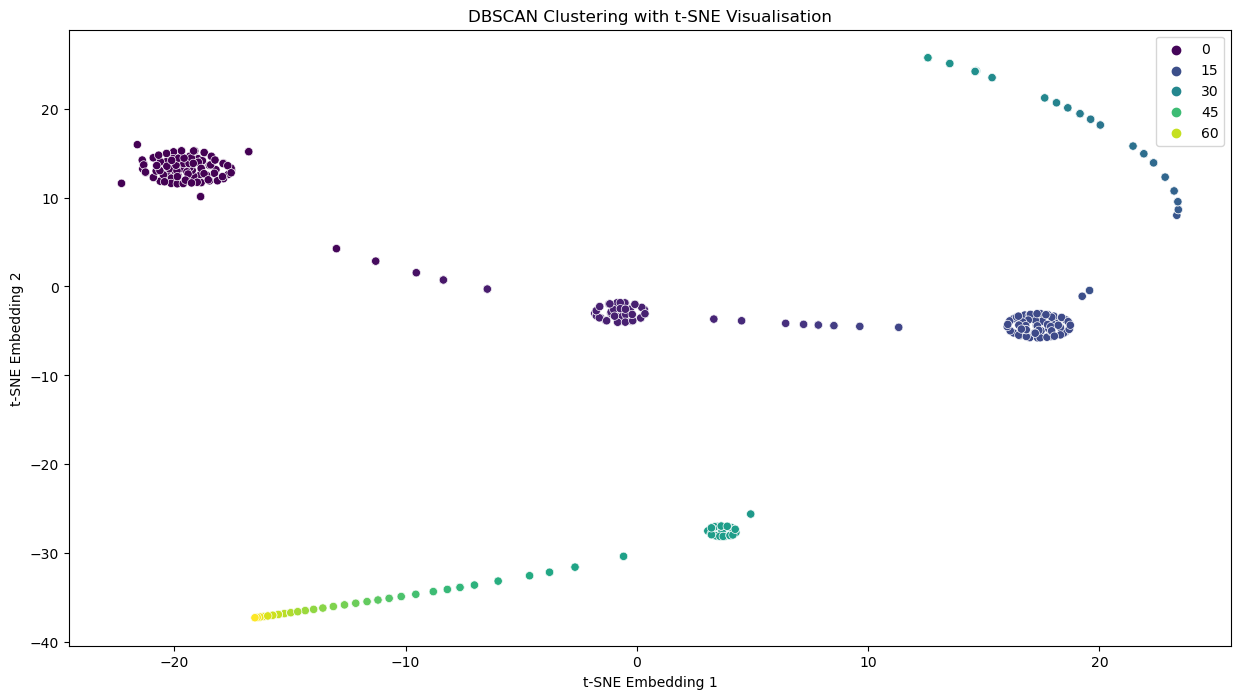

In [45]:
# scatter plot of t-SNE embeddings with cluster labels 
plt.figure(figsize= (15, 8))
sns.scatterplot(x=test[:, 0], y=test[:, 1], hue=clusters, palette='viridis')
plt.title('DBSCAN Clustering with t-SNE Visualisation')
plt.xlabel('t-SNE Embedding 1')
plt.ylabel('t-SNE Embedding 2')
plt.show()

### Agglomerative

The Agglomerative algorithm starts by considering each data point as a cluster and then merges the two closest clusters until all data points belong to a single cluster.

Agglomerative clustering can be used with various criteria, determining how the distance between two clusters is calculated. Standard criteria include single, complete, and average linkage.

One advantage of agglomerative clustering is that it produces a dendrogram, a visual representation of the hierarchical structure of the clusters. This can be useful for understanding how the data is grouped and identifying any meaningful subclusters.



In [48]:
 # Fit the data to K-means algorithm and obtain the cluster labels and centers
agglomerative = AgglomerativeClustering()

In [50]:
# Define the parameter grid
param_grid = {
    'n_clusters': [7],
    'metric': ['euclidean', 'manhattan', 'cosine'],
    'linkage': ['ward', 'complete', 'average']
}

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FitFailedWarning)
    # put your code that generates the warnings here

    # Define the grid search object
    grid_search = GridSearchCV(agglomerative, param_grid, cv=10, scoring=custom_scorer, error_score=0)

    # Fit the grid search object to the data
    grid_search.fit(data)

    # Print the best parameters and score
    print("Best parameters: ", grid_search.best_params_)
    print("Best score: ", grid_search.best_score_)

Best parameters:  {'linkage': 'ward', 'metric': 'euclidean', 'n_clusters': 7}
Best score:  0.1704873567311708


In [51]:
agglomerative_best_params = AgglomerativeClustering(n_clusters=7, linkage='ward', metric='euclidean')
lables = agglomerative_best_params.fit(data).labels_
lables

array([4, 1, 0, 3, 4, 0, 3, 1, 4, 0, 4, 4, 4, 1, 4, 4, 3, 1, 3, 4, 1, 4,
       1, 5, 1, 6, 6, 3, 3, 2, 4, 4, 1, 6, 0, 4, 1, 2, 4, 2, 4, 4, 4, 6,
       0, 5, 4, 4, 5, 2, 3, 2, 1, 1, 0, 6, 6, 1, 4, 3, 4, 4, 1, 1, 1, 1,
       1, 4, 0, 1, 4, 2, 2, 1, 6, 4, 4, 0, 1, 2, 2, 6, 5, 1, 4, 2, 2, 6,
       4, 6, 6, 6, 3, 2, 2, 4, 2, 6, 2, 6, 3, 2, 4, 6, 4, 4, 4, 3, 1, 2,
       4, 2, 1, 2, 2, 6, 2, 4, 1, 5, 6, 2, 1, 6, 3, 5, 0, 2, 0, 1, 0, 4,
       2, 6, 2, 1, 5, 0, 2, 3, 1, 4, 2, 6, 4, 2, 5, 4, 5, 6, 1, 0, 4, 3,
       4, 0, 6, 4, 4, 6, 2, 1, 1, 6, 4, 6, 5, 6, 1, 6, 4, 0, 3, 6, 1, 6,
       6, 1, 6, 1, 1, 1, 6, 0, 2, 0, 1, 6, 5, 6, 3, 2, 1, 2, 2, 1, 2, 3,
       2, 0, 2, 1, 1, 3, 2, 3, 5, 3, 4, 1, 2, 1, 0, 0, 4, 2, 1, 6, 1, 2,
       1, 6, 2, 6, 6, 1, 0, 6, 2, 2, 6, 4, 3, 2, 6, 6, 4, 5, 5, 6, 6, 1,
       4, 0, 2, 0, 4, 3, 6, 4, 1, 5, 2, 2, 0, 5, 1, 1, 0, 1, 4, 2, 1, 5,
       2, 2, 6, 4, 5, 5, 5, 4, 2, 6, 6, 6, 6, 4, 6, 3, 1, 6, 4, 5, 0, 2,
       1, 6, 2, 2, 6, 1, 4, 1, 6, 4, 6, 5, 5, 1, 1,

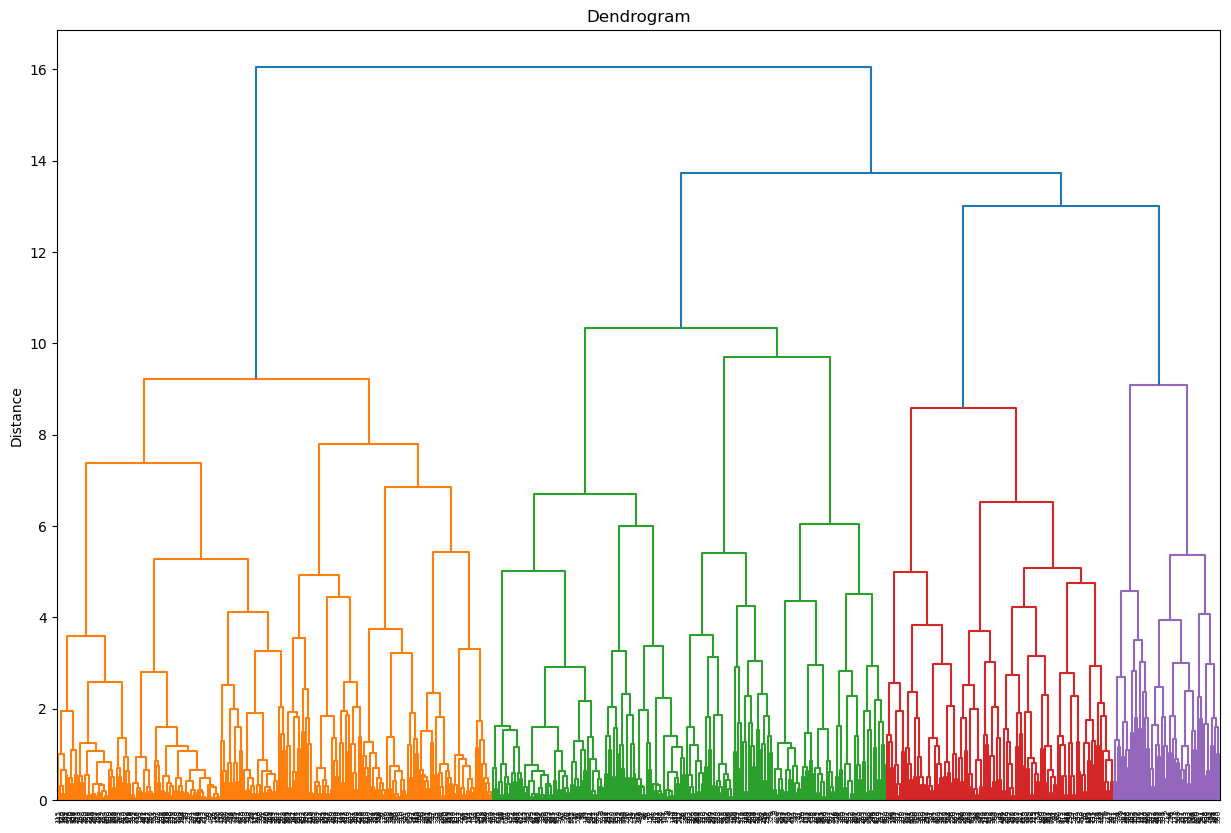

In [53]:
# Generate the linkage matrix
linkage_matrix = linkage(data, method='ward')

# Plot the dendrogram with larger figure size
fig, ax = plt.subplots(figsize=(15, 10))
dendrogram(linkage_matrix, ax=ax)

# Add labels and title
ax.set_title('Dendrogram')
ax.set_ylabel('Distance')

# Display the plot
plt.show()

In [54]:
# t-SNE manifold learning is performed
tsne = manifold.TSNE(n_components=2, init='random', learning_rate=100, random_state=42)
X_tsne = tsne.fit_transform(lables.reshape(-1,1))

In [55]:
# scatter plot of t-SNE embeddings with cluster labels 
plt.figure(figsize= (15, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels, palette='viridis')
plt.title('Agglomerative Clustering with t-SNE Visualisation')
plt.xlabel('t-SNE Embedding 1')
plt.ylabel('t-SNE Embedding 2')
plt.show()

### Conclusion

Agglomerative clustering:
 - Its advantages include its ability to handle different cluster shapes and sizes, and the hierarchical structure can provide additional insight into the data.
 - Its disadvantages are that it is not scalable and can be sensitive to noise, outliers, and initialization.

DBSCAN:
- Its advantages are that it can identify clusters of arbitrary shape and size, does not require specifying the number of clusters in advance, and is robust to noise and outliers.
- Its disadvantages include sensitivity to the choice of hyperparameters (e.g. epsilon, min_samples), may struggle with clusters of varying densities, and is not well-suited to high-dimensional data.

K-means:
- Its advantages are that it is computationally efficient, easy to implement, can handle large datasets, and works well with spherical clusters.
- Its disadvantages are that it requires specifying the number of clusters in advance, is sensitive to initialization, and can struggle with non-spherical clusters or clusters of unequal sizes and densities.

In summary, agglomerative clustering and DBSCAN have advantages over k-means in handling non-spherical clusters and not requiring the number of clusters to be specified in advance. Still, they have limitations such as sensitivity to noise and outliers or the choice of hyperparameters. K-means, conversely, is computationally efficient and suitable for large datasets but may struggle with non-spherical clusters or require a more significant number of clusters to achieve good results. The choice of clustering algorithm should be based on the specific characteristics of the data and the problem at hand.
